# Time Series prediction with RNN

This notebook uses data from temperature sensor taken every 10 minutes and uses it to predict temperature for the next 24h.

The data can be download with the command
```sh
wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
```

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

# Load data

After loading the data we will skip first column with DateTime and convert rest to numpy array

In [16]:
input_data = pd.read_csv('../../datasets/public/jena_climate_2009_2016.csv')
input_data = input_data.values[:, 1:]
print(input_data)

[[996.52 -8.02 265.4 ..., 1.03 1.75 152.3]
 [996.57 -8.41 265.01 ..., 0.72 1.5 136.1]
 [996.53 -8.51 264.91 ..., 0.19 0.63 171.6]
 ..., 
 [999.82 -3.16 270.01 ..., 1.08 2.0 215.2]
 [999.81 -4.23 268.94 ..., 1.49 2.16 225.8]
 [999.82 -4.82 268.36 ..., 1.23 1.96 184.9]]


## Let's plot our temperature data

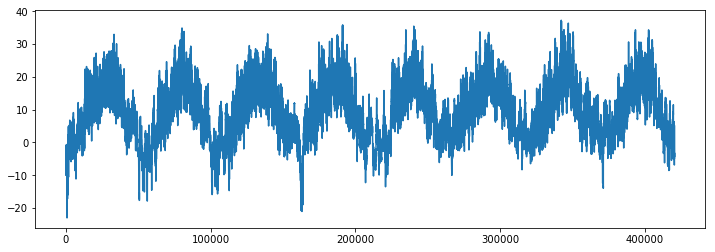

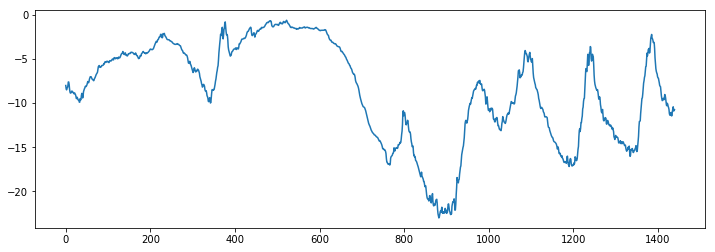

In [22]:
temperature = input_data[:, 1]
plt.plot(temperature)
plt.show()
# First 10 days
plt.plot(temperature[:1440])
plt.show()

# Preparing the data

We will use the following parameters:

In [23]:
lookback = 720  # Use data from the last 5 days
steps = 6       # Observations will be sampled at one data point per hour
delay = 144     # Targets will be 24 hours in the future
training_size = 200000 # How many samples should be used for training data

## Normalize data

We use only traing data form normalization

In [15]:
mean = input_data[:training_size].mean(axis=0)
stddev = input_data[:training_size].std(axis=0)
normalized_data = (input_data - mean) / stddev

array([[996.52, -8.02, 265.4, ..., 1.03, 1.75, 152.3],
       [996.57, -8.41, 265.01, ..., 0.72, 1.5, 136.1],
       [996.53, -8.51, 264.91, ..., 0.19, 0.63, 171.6],
       ..., 
       [999.82, -3.16, 270.01, ..., 1.08, 2.0, 215.2],
       [999.81, -4.23, 268.94, ..., 1.49, 2.16, 225.8],
       [999.82, -4.82, 268.36, ..., 1.23, 1.96, 184.9]], dtype=object)

## Data generator